# Tree models project
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we will use the [Telco Customer Churn dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and create a tree-based model capable of predict the behaviour to retain customer, to predict whether or not a customer will churn.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration

We will first check the customer characteristics.

In [2]:
customer_df = pd.read_csv('data/Telco_Customer_Churn.csv')
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
customer_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Let's check how many NaN values we have in the dataset.

In [5]:
customer_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

How unbalanced are the classes to predict?

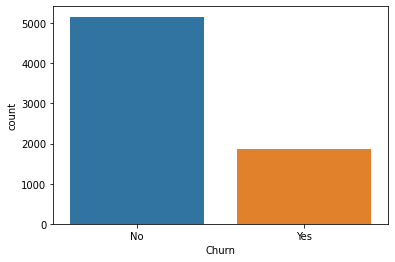

In [6]:
sns.countplot(data=customer_df, x='Churn');

Let's check the relationship between TotalCharges and Churn.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

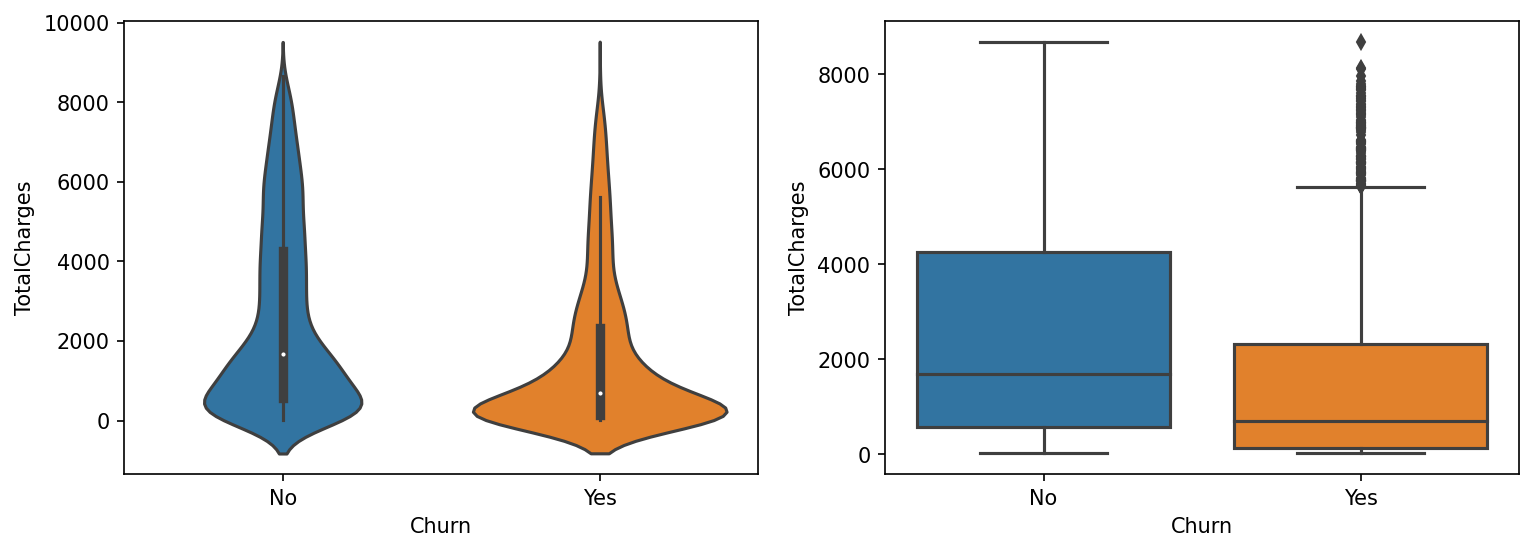

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12,4), dpi=150)
sns.violinplot(data=customer_df, x='Churn', y='TotalCharges', ax=axes[0])
sns.boxplot(data=customer_df, x='Churn', y='TotalCharges', ax=axes[1])

Let's see the distribution of TotalCharges per Contract type, and also take into account the Churn class.

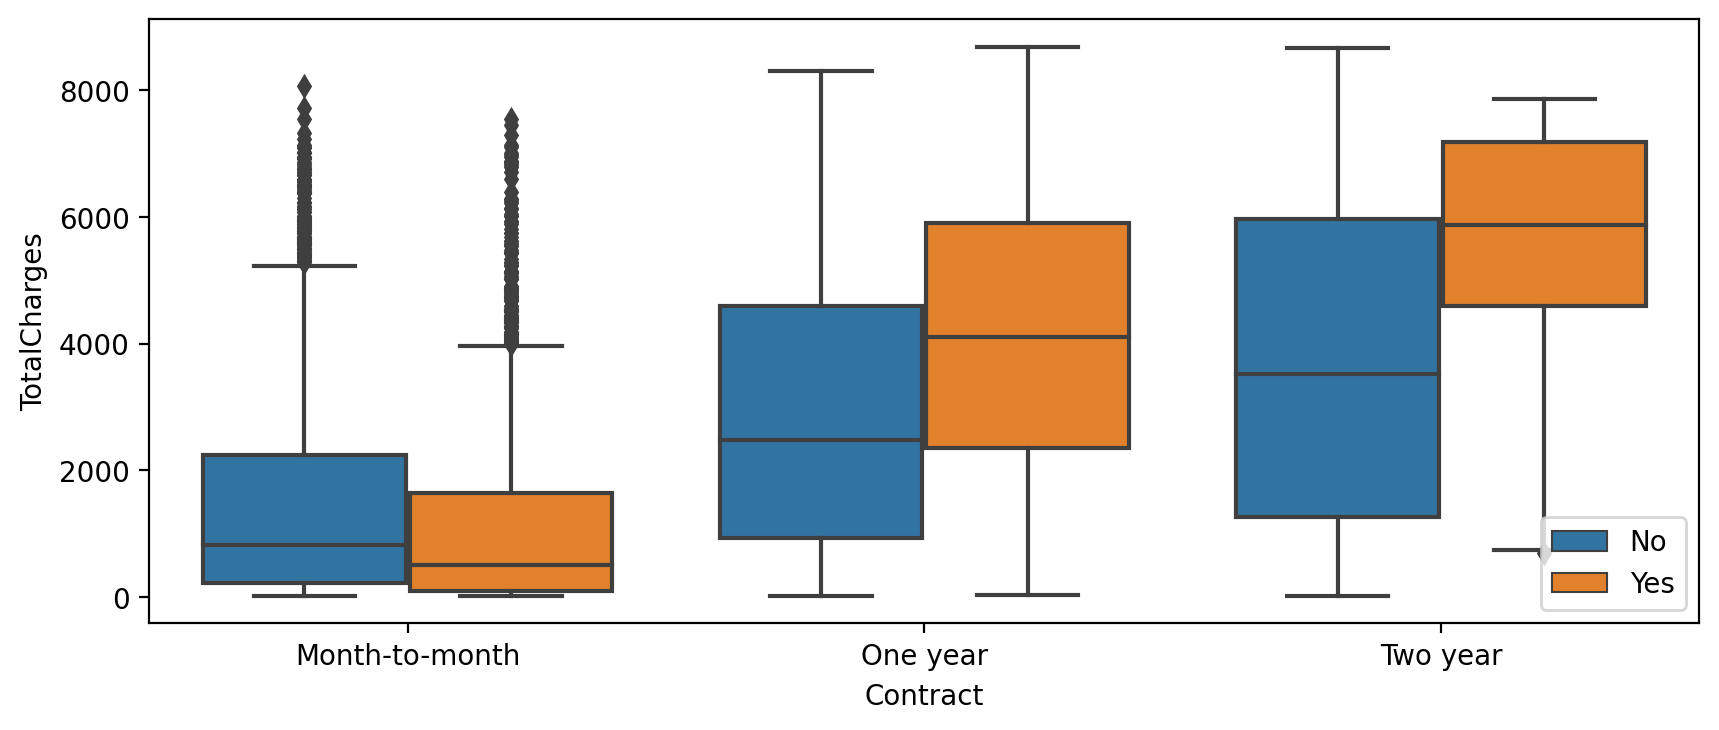

In [8]:
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(data=customer_df, x="Contract", y="TotalCharges", hue="Churn")
plt.legend(loc="lower right");

Let's check the correlation between the features. For that, we need to change the categorical variables to numeric first, using dummy variables. 

In [9]:
# In this case, we don't drop the first, so we can visualize each value for each variable
correlation_values  = pd.get_dummies(customer_df[["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
                                             "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                                             "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                                             "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]]).corr()

In [10]:
correlation_values['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

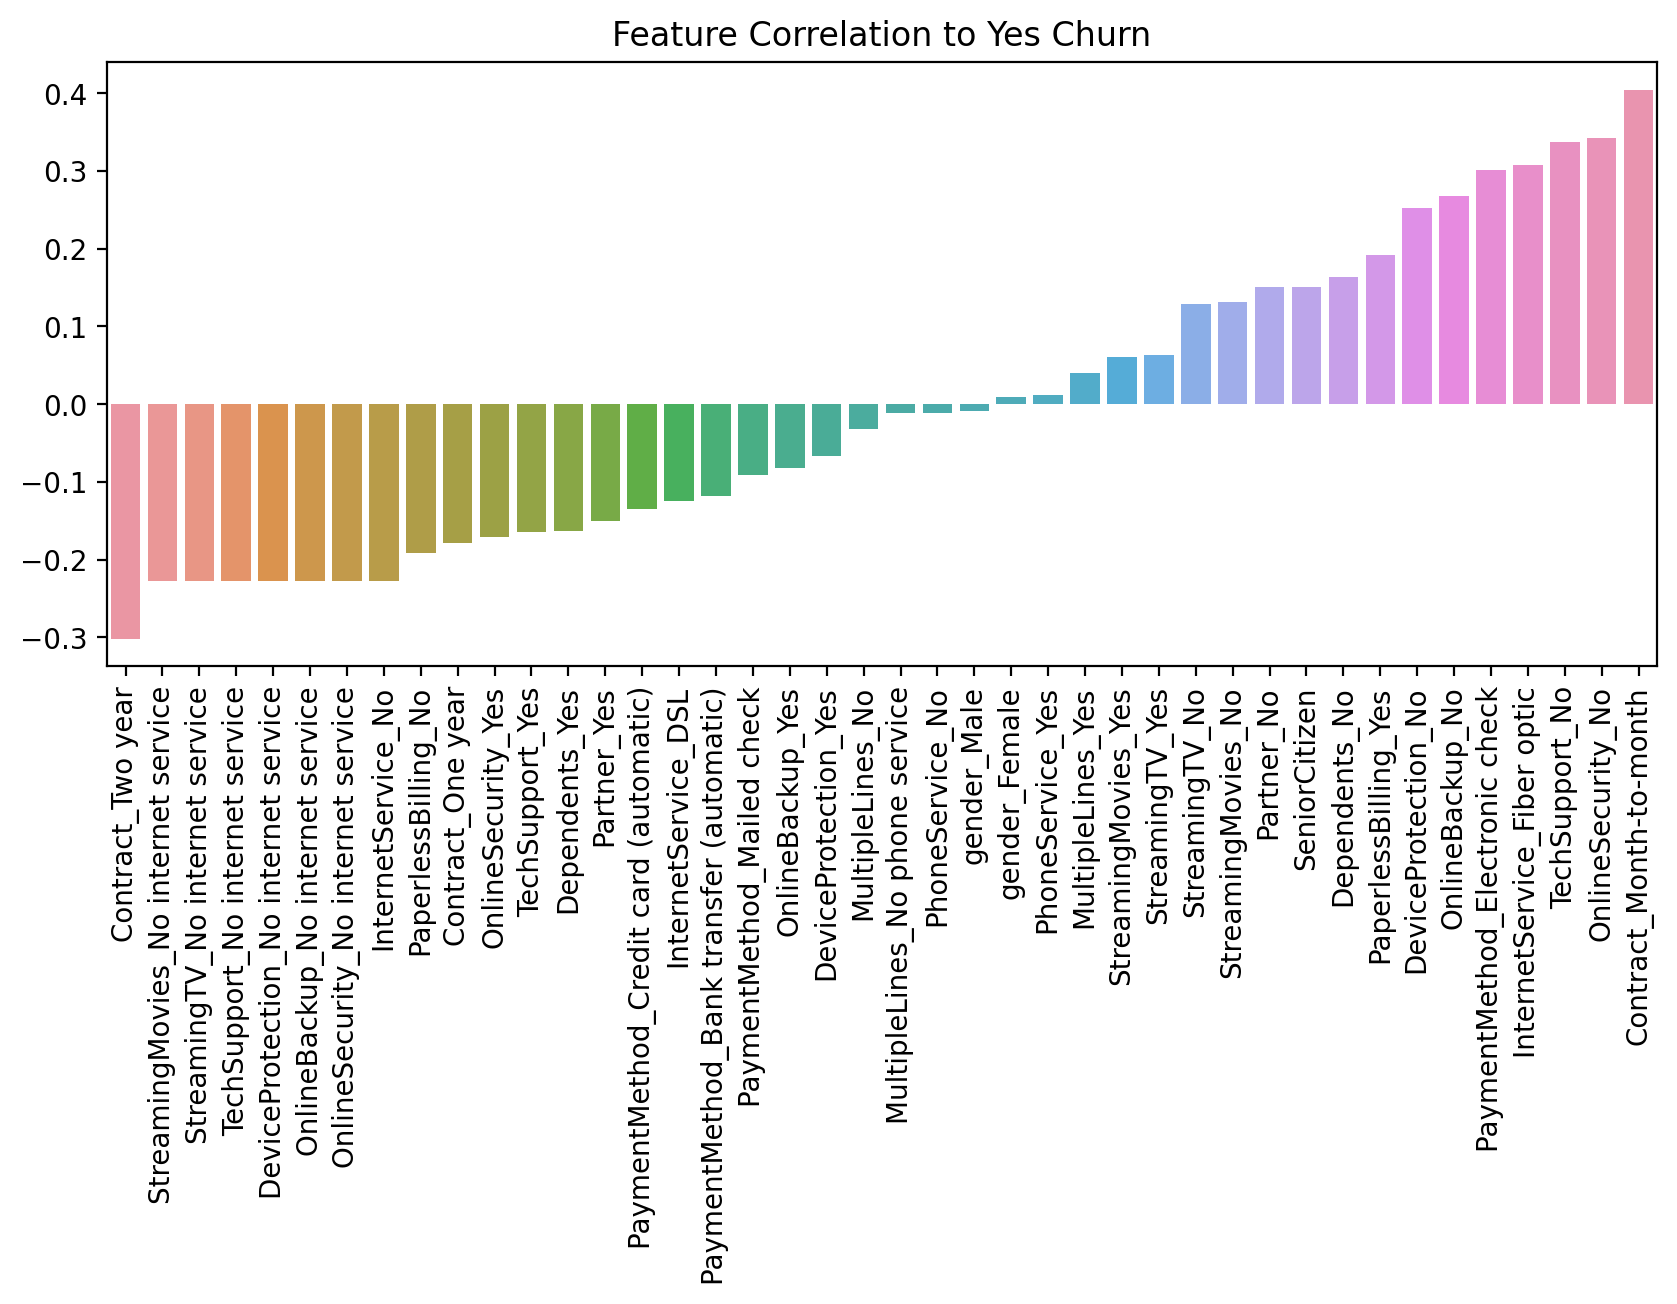

In [11]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(x=correlation_values['Churn_Yes'].sort_values().iloc[1:-1].index, y=correlation_values['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [12]:
customer_df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [13]:
customer_df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

Let's take a closer look at the tenure variable.

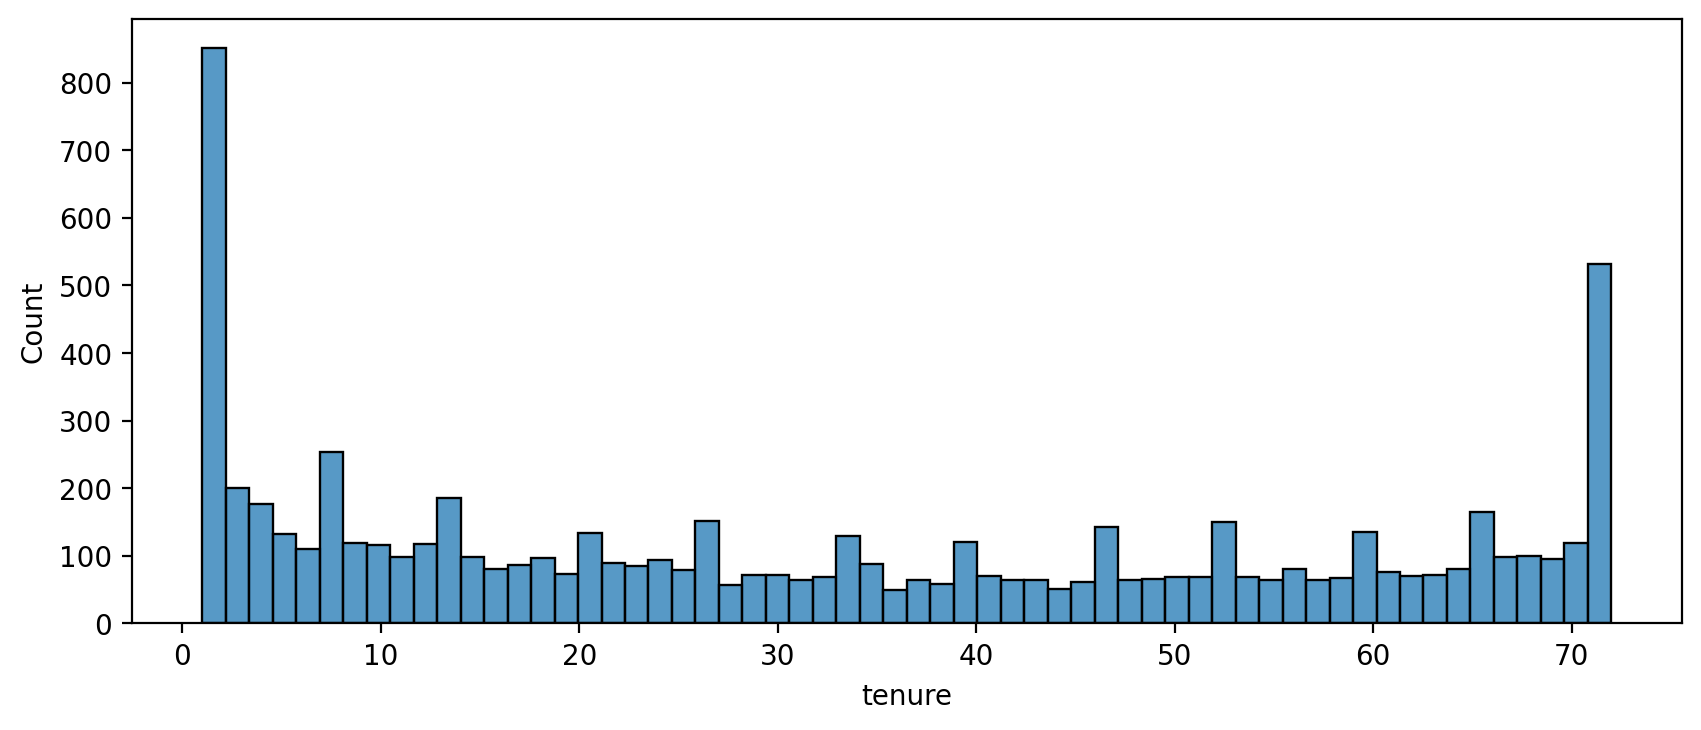

In [14]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=customer_df, x='tenure', bins=60);

<Figure size 2000x600 with 0 Axes>

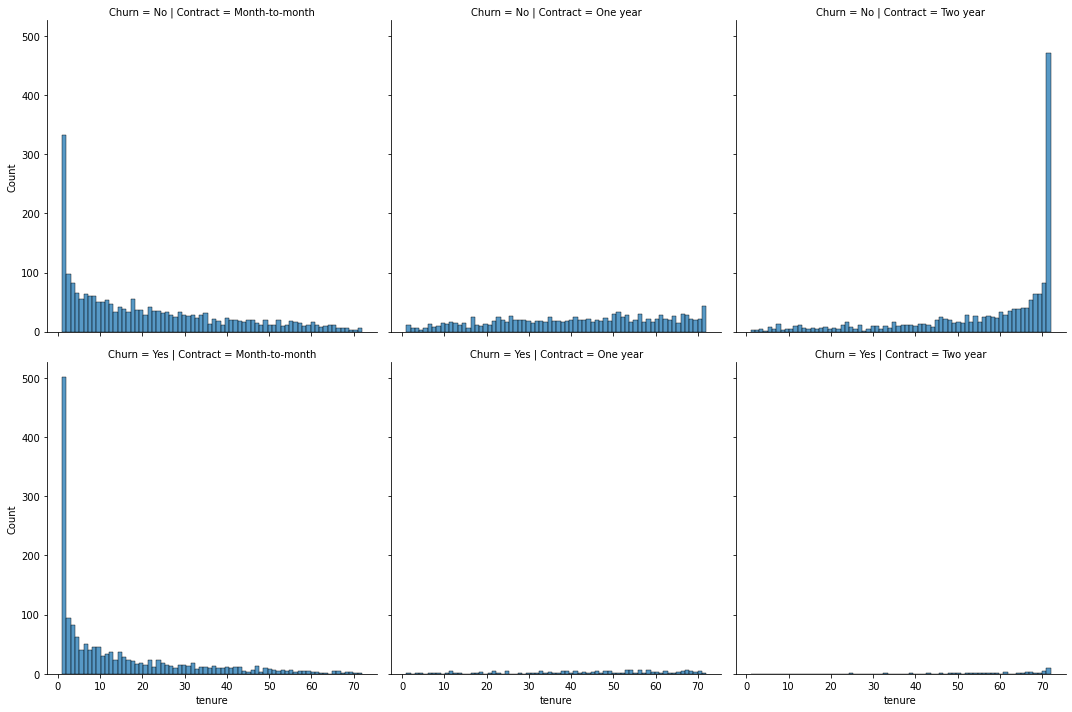

In [15]:
plt.figure(figsize=(10,3), dpi=200)
sns.displot(data=customer_df, x='tenure', bins=70, col='Contract', row='Churn');

Let's explore the relation between MonthlyCharges and TotalCharges, also taking into account Churn.

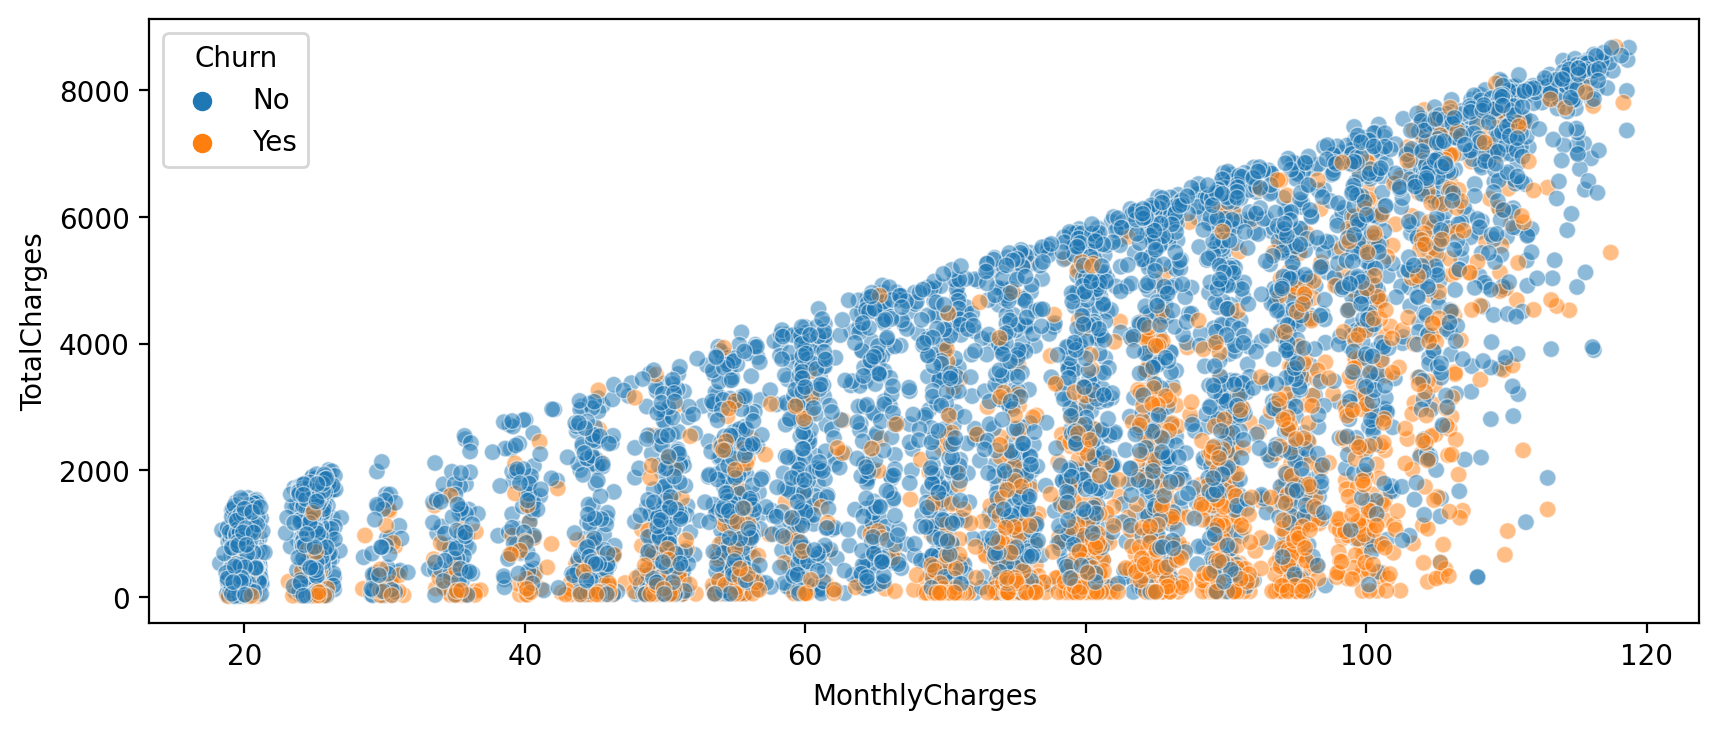

In [16]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=customer_df, x='MonthlyCharges', y='TotalCharges', hue='Churn', linewidth=0.5, alpha=0.5);

Let's calculate the Churn rate (the percentage that had Yes Churn) per tenure cohort (one month).

In [17]:
yes_churn = customer_df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
no_churn = customer_df.groupby(['Churn', 'tenure']).count().transpose()['No']

churn_rate = 100 * yes_churn / (no_churn + yes_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

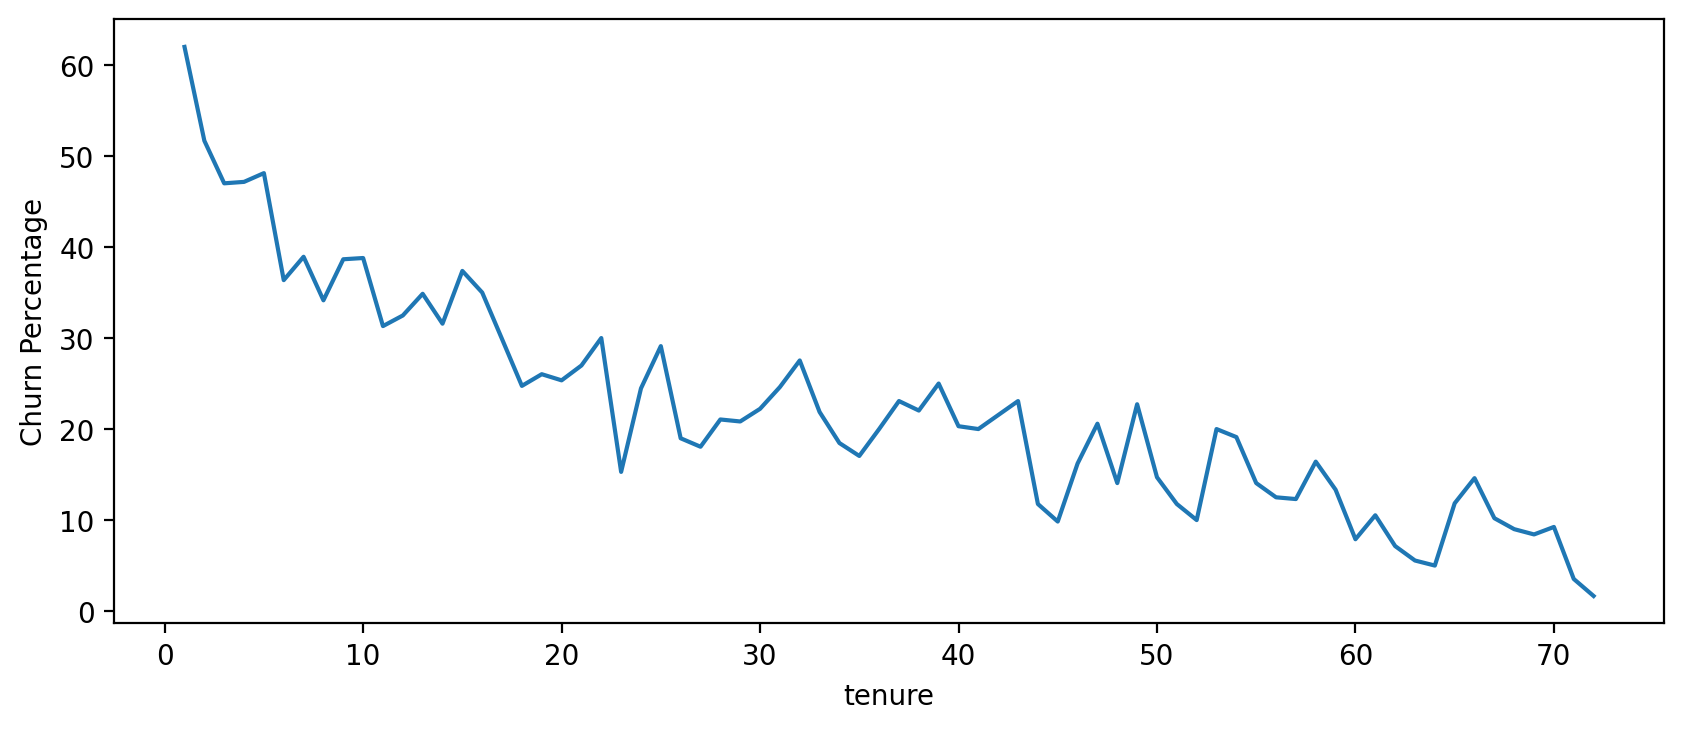

In [18]:
plt.figure(figsize=(10,4), dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

The plot shows that the longer the tenure of the cohort, the less of a churn rate.

Now let's try to visualize TotalCharges vs MonthlyCharges, and also using the tenure cohort. First we need to define these categories.

In [19]:
def tenure_cohort(tenure):
    if tenure < 13:
        return "0-12 Months"
    elif tenure < 25:
        return "12-24 Months"
    elif tenure < 49:
        return "24-48 Months"
    else:
        return "Over 48 Months"
    
    
customer_df["Tenure Cohort"] = customer_df["tenure"].apply(tenure_cohort)
customer_df.head(10)[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

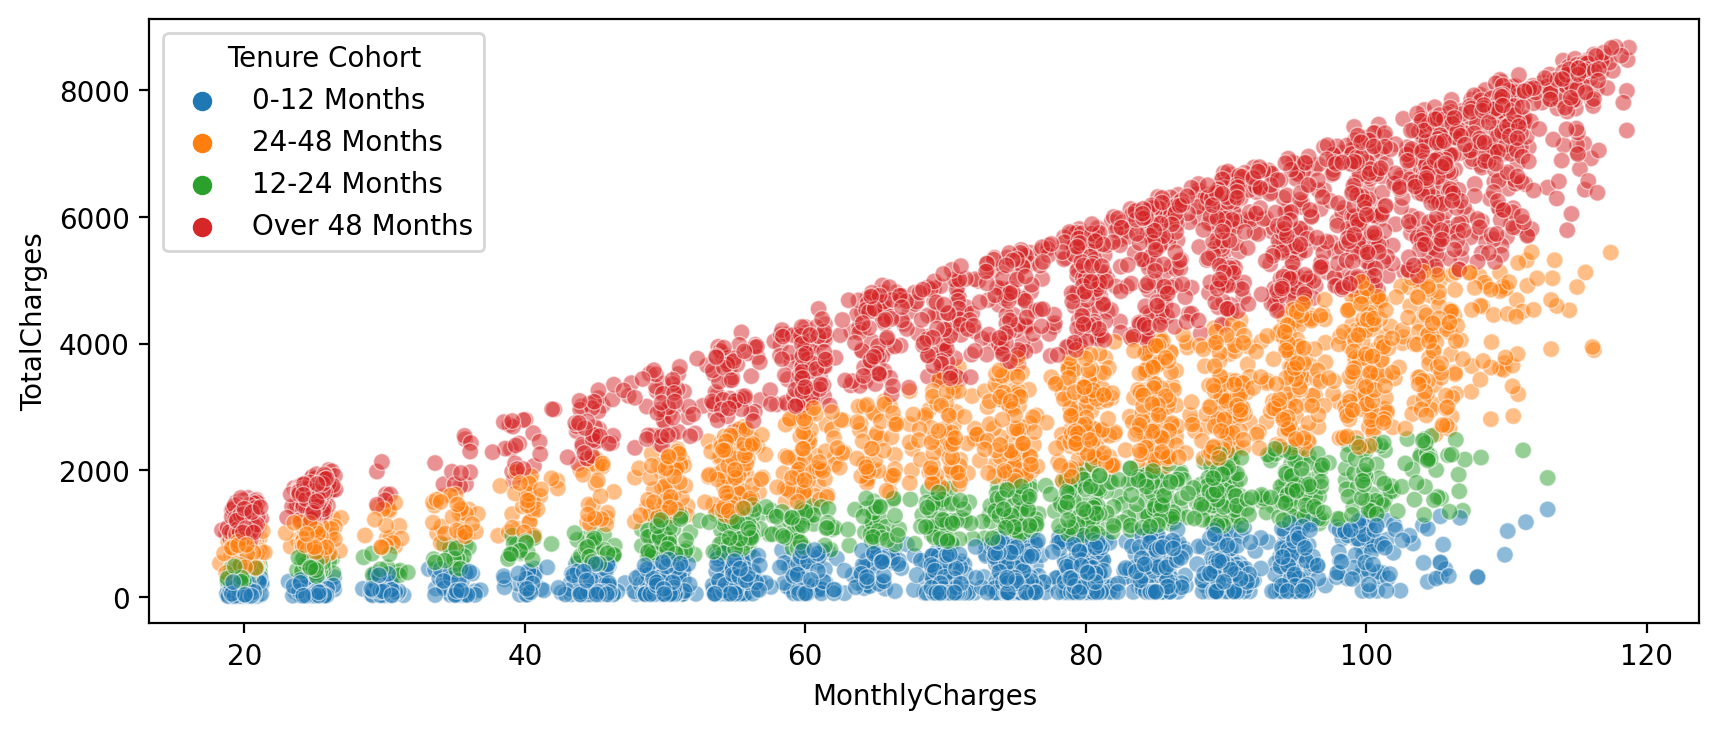

In [20]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=customer_df, x="MonthlyCharges", y="TotalCharges", hue="Tenure Cohort", linewidth=0.5, alpha=0.5)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

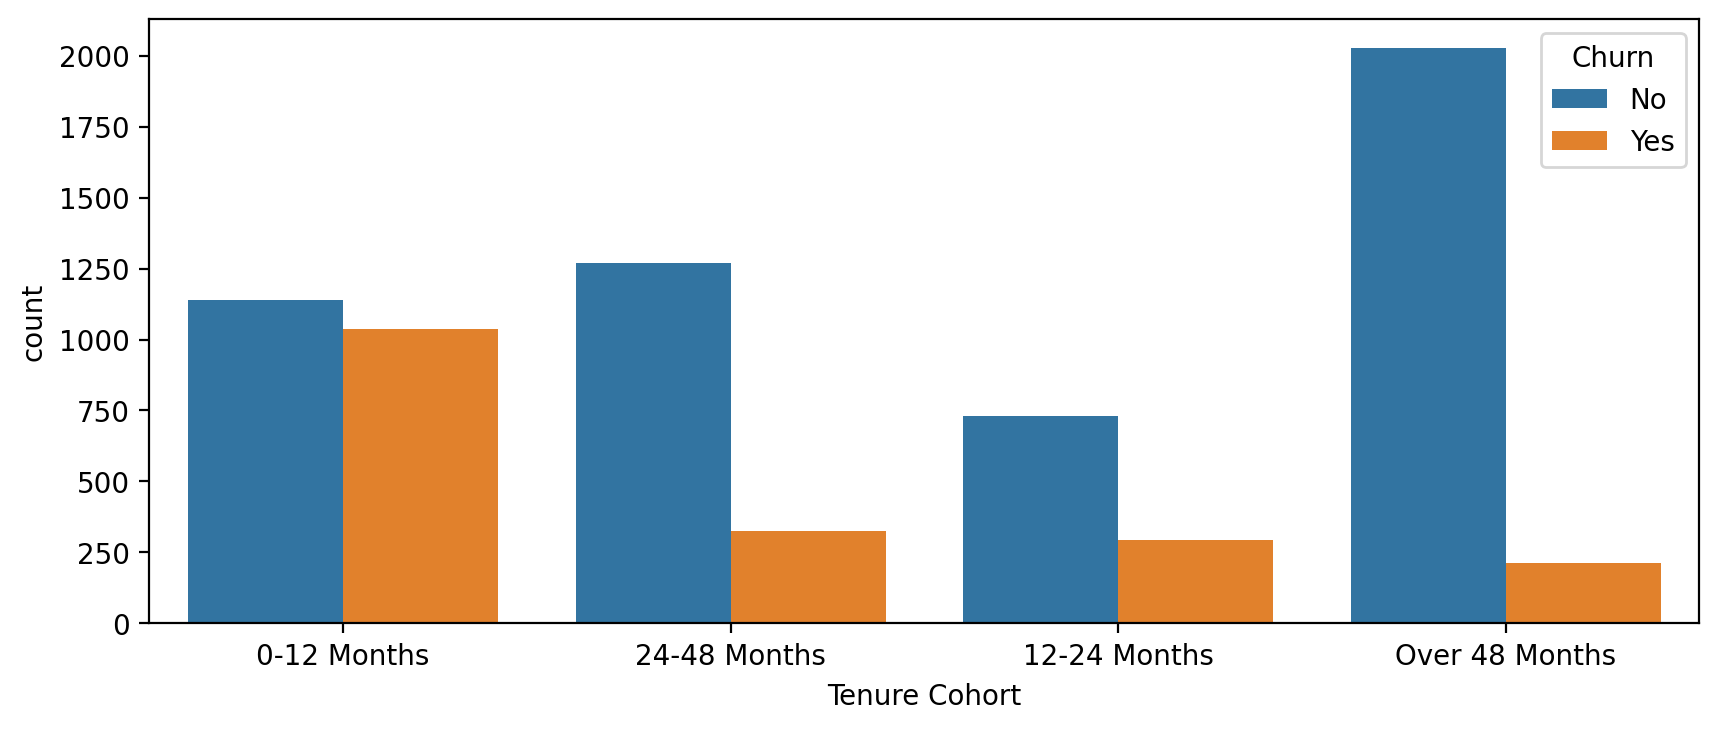

In [21]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=customer_df, x="Tenure Cohort", hue="Churn")

<Figure size 2000x800 with 0 Axes>

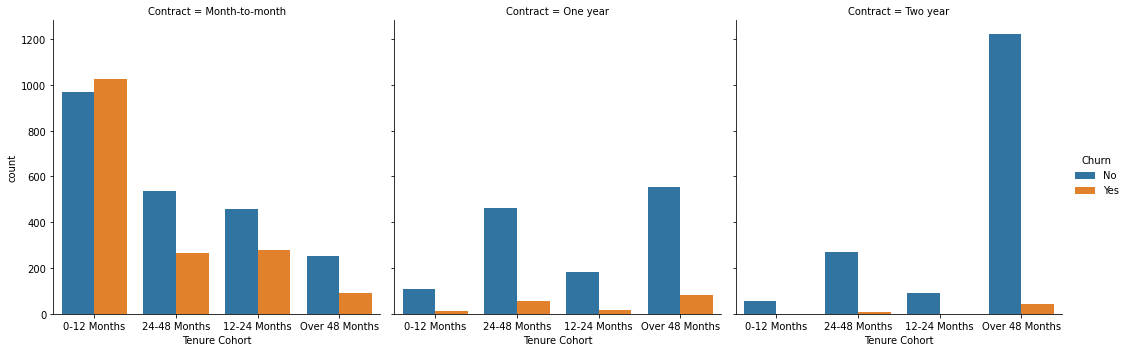

In [22]:
plt.figure(figsize=(10,4), dpi=200)
sns.catplot(data=customer_df, x='Tenure Cohort', hue='Churn', col='Contract', kind='count')

### Creation of train and test sets

In [23]:
X = customer_df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)

y = customer_df["Churn"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52)

### Creation of models

We will create three different tree-based models and evaluate their performance.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [26]:
# Creation of the models

dt_model = DecisionTreeClassifier(max_depth=6)
rf_model = RandomForestClassifier(n_estimators=100)
ada_model = AdaBoostClassifier()

In [27]:
# Training the models

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [28]:
# Predictions

dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
ada_preds = ada_model.predict(X_test)

### Performance evaluation

              precision    recall  f1-score   support

          No       0.85      0.91      0.87       512
         Yes       0.69      0.56      0.62       192

    accuracy                           0.81       704
   macro avg       0.77      0.73      0.75       704
weighted avg       0.80      0.81      0.80       704



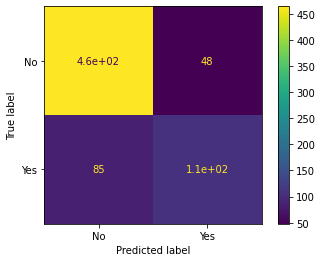

In [29]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test, dt_preds))
plot_confusion_matrix(dt_model, X_test, y_test);

              precision    recall  f1-score   support

          No       0.83      0.92      0.87       512
         Yes       0.69      0.50      0.58       192

    accuracy                           0.80       704
   macro avg       0.76      0.71      0.73       704
weighted avg       0.79      0.80      0.79       704



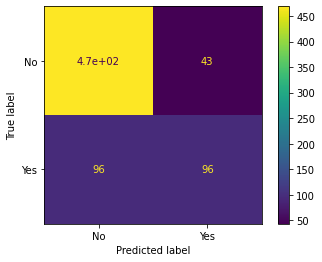

In [30]:
print(classification_report(y_test, rf_preds))
plot_confusion_matrix(rf_model, X_test, y_test);

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       512
         Yes       0.69      0.57      0.62       192

    accuracy                           0.81       704
   macro avg       0.77      0.74      0.75       704
weighted avg       0.81      0.81      0.81       704



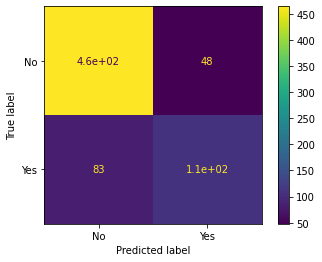

In [32]:
print(classification_report(y_test, ada_preds))
plot_confusion_matrix(ada_model, X_test, y_test);